In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import optuna
#from xgboost import XGBRegressor
#from pycaret.regression import setup, compare_models, models
from scipy import stats
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Load the data

In [244]:
df_train = pd.read_csv('Ames_Housing_Price_Data.csv',index_col=0)

In [245]:
df_raw=df_train.copy()

## Examine the data

In [246]:
df_train.shape

(2580, 81)

In [247]:
df_train.head(10)

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1   909176150        856     126000          30       RL          NaN   
2   905476230       1049     139500         120       RL         42.0   
3   911128020       1001     124900          30  C (all)         60.0   
4   535377150       1039     114000          70       RL         80.0   
5   534177230       1665     227000          60       RL         70.0   
6   908128060       1922     198500          85       RL         64.0   
7   902135020        936      93000          20       RM         60.0   
8   528228540       1246     187687          20       RL         53.0   
9   923426010        889     137500          20       RL         74.0   
10  908186050       1072     140000         180       RM         35.0   

    LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1      7890   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
2      4235   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3      6060   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
4      8146   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
5      8400   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
6      7301   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
7      6000   Pave  Pave      Reg         Bnk    AllPub    Inside       Mod   
8      3710   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9     12395   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10     3675   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1         SWISU       Norm       Norm     1Fam     1Story            6   
2       Edwards       Norm       Norm   TwnhsE     1Story            5   
3        IDOTRR       Norm       Norm     1Fam     1Story            5   
4       OldTown       Norm       Norm     1Fam     2Story            4   
5        NWAmes       Norm       Norm     1Fam     2Story            8   
6       Edwards       Norm       Norm     1Fam     SFoyer            7   
7       OldTown       Norm       Norm   2fmCon     1Story            4   
8       Blmngtn       Norm       Norm     1Fam     1Story            7   
9       Mitchel       Norm       Norm     1Fam     1Story            5   
10      Edwards       Norm       Norm   TwnhsE     SFoyer            6   

    OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
1             6       1939          1950     Gable  CompShg     Wd Sdng   
2             5       1984          1984     Gable  CompShg     HdBoard   
3             9       1930          2007       Hip  CompShg     MetalSd   
4             8       1900          2003     Gable  CompShg     MetalSd   
5             6       2001          2001     Gable  CompShg     VinylSd   
6             5       2003          2003     Gable  CompShg     HdBoard   
7             4       1953          1953     Gable  CompShg     MetalSd   
8             5       2007          2008     Gable  CompShg     WdShing   
9             6       1984          1984     Gable  CompShg     HdBoard   
10            5       2005          2005     Gable  CompShg     VinylSd   

   Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1      Wd Sdng       None         0.0        TA        TA     CBlock       TA   
2      HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
3      MetalSd       None         0.0        Gd        TA     BrkTil       TA   
4      MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
5      VinylSd       None         0.0        Gd        TA      PConc       Gd   
6      HdBoard    BrkFace       500.0        Gd        TA       Slab      NaN   
7      MetalSd       None         0.0        Fa        TA     CBlock       Fa   
8      Wd Shng    BrkFace        20.0        Gd

In [248]:
#Check the number of NAs in each column
df_train.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

# Data Cleaning/Preprocessing

In [249]:
target=df_train.SalePrice

In [250]:
test_ids=df_train.PID

In [251]:
df_train=df_train.drop(columns=['PID', 'SalePrice'])

In [252]:
df_train_copy=df_train.copy()

### Use .info() to see length and dtypes

In [253]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   MSSubClass     2580 non-null   int64  
 2   MSZoning       2580 non-null   object 
 3   LotFrontage    2118 non-null   float64
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   Alley          168 non-null    object 
 7   LotShape       2580 non-null   object 
 8   LandContour    2580 non-null   object 
 9   Utilities      2580 non-null   object 
 10  LotConfig      2580 non-null   object 
 11  LandSlope      2580 non-null   object 
 12  Neighborhood   2580 non-null   object 
 13  Condition1     2580 non-null   object 
 14  Condition2     2580 non-null   object 
 15  BldgType       2580 non-null   object 
 16  HouseStyle     2580 non-null   object 
 17  OverallQual    2580 non-null   int64  
 18  OverallCo

## Identify numerical and categorical variables

In [254]:
cols_list=list(df_train.columns)
cols_list

['GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [255]:
#MSSUBClass is actually a categoical data coluumn per the data descrpition text file
df_train.MSSubClass=df_train.MSSubClass.astype(str)

In [256]:
#looking at columns that consist of numberic values only
df_train.select_dtypes("number")
#df_train._get_numeric_data()

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1          856          NaN     7890            6            6       1939   
2         1049         42.0     4235            5            5       1984   
3         1001         60.0     6060            5            9       1930   
4         1039         80.0     8146            4            8       1900   
5         1665         70.0     8400            8            6       2001   
..         ...          ...      ...          ...          ...        ...   
759        952          NaN     8854            6            6       1916   
760       1733          NaN    13680            3            5       1955   
761       2002         82.0     6270            5            6       1949   
762       1842          NaN     8826            7            5       2000   
763       1911         80.0     9554            8            5       1993   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1            1950         0.0       238.0         0.0      618.0        856.0   
2            1984       149.0       552.0       393.0      104.0       1049.0   
3            2007         0.0       737.0         0.0      100.0        837.0   
4            2003         0.0         0.0         0.0      405.0        405.0   
5            2001         0.0       643.0         0.0      167.0        810.0   
..            ...         ...         ...         ...        ...          ...   
759          1950         0.0         0.0         0.0      952.0        952.0   
760          1955         0.0         0.0         0.0        0.0          0.0   
761          1950         0.0       284.0         0.0      717.0       1001.0   
762          2000       144.0       841.0         0.0      144.0        985.0   
763          1994       125.0       380.0         0.0      397.0        777.0   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1         856         0             0           1.0           0.0         1   
2        1049         0             0           1.0           0.0         2   
3        1001         0             0           0.0           0.0         1   
4         717       322             0           0.0           0.0         1   
5         810       855             0           1.0           0.0         2   
..        ...       ...           ...           ...           ...       ...   
759       952         0             0           0.0           0.0         1   
760      1733         0             0           0.0           0.0         2   
761      1001      1001             0           0.0           0.0         2   
762       985       857             0           1.0           0.0         2   
763      1065       846             0           0.0           0.0         2   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1           0             2             1             4           1   
2           0             2             1             5           0   
3           0             2             1             5           0   
4           0             2             1             6           0   
5           1             3             1             6           0   
..        ...           ...           ...           ...         ...   
759         0             2             1             4           1   
760         0             4             1             8           1   
761         0             4             2             8           0   
762         1             3             1             7           1   
763         1             3             1             8           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1         1939.0         2.0       399.0           0            0   
2         1984.0         1.0       266.0           0          105   
3         1930.0         1.0       216.0         154            0   
4         1940.0         1.0 

# (Moved to later) Remove features based on correlation to avoid multicollinearity 

In [257]:
#corr=df_train.corr()
#plt.figure(figsize = (16, 16))
#sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues")

#plt.title('Heatmap of Correlation Matrix')
#corr

IndentationError: unexpected indent (<ipython-input-257-31774c122420>, line 4)

In [ ]:
#high_corr_pairs = np.where(abs(corr) > 0.7)
#high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs)
                                        if x != y and x < y]
#high_corr_pairs

### Per the data description, 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF

GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF

In [258]:

#df_train=df_train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"],axis=1)

## Data Inputation

### Categorical

In [259]:
#Show all column names with missing values
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [260]:
#Show all categorical/object columns with missing values
df_train.select_dtypes("object").isna().sum()!=0

MSSubClass       False
MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleConditi

In [261]:
#Fill NAs in these columns with None when a missing value means something
#e.g. NA basement means no basement

for column in ["Alley",
               "MasVnrType",
               "BsmtQual",
               "BsmtCond",
               "BsmtExposure",
               "BsmtFinType1",
               "BsmtFinType2",
               "FireplaceQu",
               "GarageType",
               "GarageFinish",
               "GarageQual",
               "GarageCond",
               "PoolQC",
               "Fence",
               "MiscFeature"]:
    df_train[column]=df_train[column].fillna("None")

In [262]:
#Fill NAs in these columns with mode
for column in ["MasVnrType","Electrical"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [263]:
df_train.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Numerical

In [264]:
df_train.select_dtypes("number").isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [265]:
#Show all numeric columns with missing values
df_train.select_dtypes("number").isna().sum()!=0

GrLivArea        False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
BsmtFullBath      True
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [266]:
for column in ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]:
    try:
        df_train[column]=df_train[column].fillna(df_train[column].median())
    except:
        continue

In [267]:
for column in ["GarageYrBlt"]:
    try:
        df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
    except:
        continue

In [268]:
df_train.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.5
ClearCr    81.0
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    72.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    70.0
Somerst    72.0
StoneBr    60.0
Timber     81.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [269]:
df_train.loc[df_train["Neighborhood"].isin(['Landmrk','GrnHill'])]

GrLivArea MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
110       1502        120       RM          NaN     9763   Pave  None   
684       1295        120       RM          NaN     8239   Pave  None   
205       1320        160       RH          NaN     3612   Pave  None   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
110      IR1         Lvl    AllPub    Inside       Gtl      GrnHill   
684      IR1         Lvl    AllPub    Inside       Gtl      GrnHill   
205      IR1         Lvl    AllPub    Inside       Gtl      Landmrk   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
110       Norm       Norm   TwnhsE     1Story            7            5   
684       Norm       Norm   TwnhsE     1Story            7            5   
205       Norm       Norm    Twnhs     2Story            6            5   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
110       1998          1998     Gable  CompShg     Wd Sdng     Wd Sdng   
684       1986          1986     Gable  CompShg     BrkFace     Wd Sdng   
205       1993          1994     Gable  CompShg     VinylSd     VinylSd   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
110    BrkFace       239.0        Gd        TA      PConc       Gd       TA   
684       None         0.0        Gd        TA     CBlock     None     None   
205       None         0.0        TA        TA      PConc       Gd       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
110           No          GLQ      1102.0          ALQ        72.0      328.0   
684         None         None         0.0         None         0.0        0.0   
205           No          GLQ       338.0          Unf         0.0      292.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
110       1502.0    GasA        Ex          Y      SBrkr      1502         0   
684          0.0    GasA        Gd          Y      SBrkr      1295         0   
205        630.0    GasA        Ex          Y      SBrkr       630       690   

     LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
110             0           1.0           0.0         1         1   
684             0           0.0           0.0         2         0   
205             0           0.0           0.0         2         1   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
110             1             1          Gd             5        Typ   
684             2             1          Gd             5        Typ   
205             3             1          TA             5        Typ   

     Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
110           1          TA     Attchd       1998.0          Fin         1.0   
684           0        None     Attchd       1986.0          RFn         1.0   
205           0        None     Detchd       1993.0          Unf         2.0   

     GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
110       286.0         TA         TA          Y           0            0   
684       312.0         TA         TA          Y           0            0   
205       484.0         TA         TA          Y           0           48   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence  \
110              0          0            0         0   None   None   
684              0          0            0         0   None   None   
205              0          0            0         0   None  MnPrv   

    MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
110        None        0       9    2007      WD         Normal  
684        None        0      11    2006      WD         Normal  
205        None        0       6    2006      WD         Normal

In [270]:
#Impute missing values in LotFrontage with the median by Neighborhood 
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [271]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [272]:
df_train.select_dtypes("number").isna().sum()

GrLivArea        0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [273]:
df_train.isna().sum()
#Check if there're still any missing values

GrLivArea        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Summarize numberical and categorical variables separately

In [274]:
df_train.describe(include=[np.number])

GrLivArea  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2580.000000  2580.000000    2580.000000  2580.000000  2580.000000   
mean   1486.039922    68.868798   10120.153488     6.046124     5.618605   
std     488.650181    21.134646    8126.937892     1.367590     1.122008   
min     334.000000    21.000000    1300.000000     1.000000     1.000000   
25%    1112.000000    60.000000    7406.750000     5.000000     5.000000   
50%    1436.000000    70.000000    9391.000000     6.000000     5.000000   
75%    1733.000000    80.000000   11494.000000     7.000000     6.000000   
max    4676.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2580.000000   2580.000000  2580.000000  2580.000000  2580.000000   
mean   1970.313953   1983.751938    98.769380   444.322868    53.218217   
std      29.719705     20.490242   175.546045   429.253356   174.393251   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1965.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1992.000000     0.000000   384.000000     0.000000   
75%    1999.000000   2003.000000   157.000000   732.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  2288.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    539.066279  1036.664341  1144.975194   336.820155      4.244574   
std     425.120979   418.475804   375.958955   424.072452     44.403603   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     215.000000   792.000000   871.750000     0.000000      0.000000   
50%     448.000000   979.000000  1071.000000     0.000000      0.000000   
75%     784.000000  1266.250000  1364.000000   703.000000      0.000000   
max    2336.000000  3206.000000  3820.000000  1872.000000   1064.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2580.000000   2580.000000  2580.000000  2580.000000   2580.000000   
mean       0.434884      0.062016     1.550775     0.378295      2.850388   
std        0.518768      0.244424     0.545825     0.499237      0.822863   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      6.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count    2580.00000   2580.000000  2580.000000  2580.000000  2580.000000   
mean        1.04031      6.387209     0.604264  1978.382946     1.747674   
std         0.20255      1.535186     0.648604    24.799011     0.738551   
min         0.00000      2.000000     0.000000  1895.000000     0.000000   
25%         1.00000      5.000000     0.000000  1961.000000     1.000000   
50%         1.00000      6.000000     1.000000  1980.000000     2.000000   
75%         1.00000      7.000000     1.000000  2002.000000     2.000000   
max         3.00000     13.000000     4.000000  2010.000000     5.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2580.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean    466.845349    95.919767    46.085271      23.214341     2.511240   
std     207.436662   129.052016    66.060664      64.107825    25.293935   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     474.000000     0.000000    25.500000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000  

In [275]:
df_train.describe(include=['O']) #The 'O' stands for objects

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count        2580     2580   2580  2580     2580        2580      2580   
unique         16        7      2     3        4           4         2   
top            20       RL   Pave  None      Reg         Lvl    AllPub   
freq          939     2008   2570  2412     1641        2337      2578   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       2580      2580         2580       2580       2580     2580   
unique         5         3           28          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1886      2458          410       2228       2555     2139   

       HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
count        2580      2580     2580        2580        2580       2580   
unique          8         6        7          15          16          4   
top        1Story     Gable  CompShg     VinylSd     VinylSd       None   
freq         1288      2059     2544         868         856       1573   

       ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
count       2580      2580       2580     2580     2580         2580   
unique         4         5          6        6        6            5   
top           TA        TA     CBlock       TA       TA           No   
freq        1636      2232       1140     1166     2316         1708   

       BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
count          2580         2580    2580      2580       2580       2580   
unique            7            7       6         5          2          4   
top             GLQ          Unf    GasA        Ex          Y      SBrkr   
freq            753         2180    2540      1293       2417       2366   

       KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual  \
count         2580       2580        2580       2580         2580       2580   
unique           5          7           6          7            4          6   
top             TA        Typ        None     Attchd          Unf         TA   
freq          1358       2399        1241       1527         1112       2312   

       GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
count        2580       2580   2580  2580        2580     2580          2580  
unique          6          3      5     5           5       10             6  
top            TA          Y   None  None        None      WD         Normal  
freq         2356       2336   2571  2055        2483     2392          2414

# Feature Transformations

In [276]:
df_train.select_dtypes("number")

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1          856         60.0     7890            6            6       1939   
2         1049         42.0     4235            5            5       1984   
3         1001         60.0     6060            5            9       1930   
4         1039         80.0     8146            4            8       1900   
5         1665         70.0     8400            8            6       2001   
..         ...          ...      ...          ...          ...        ...   
759        952         51.5     8854            6            6       1916   
760       1733         65.0    13680            3            5       1955   
761       2002         82.0     6270            5            6       1949   
762       1842         70.0     8826            7            5       2000   
763       1911         80.0     9554            8            5       1993   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1            1950         0.0       238.0         0.0      618.0        856.0   
2            1984       149.0       552.0       393.0      104.0       1049.0   
3            2007         0.0       737.0         0.0      100.0        837.0   
4            2003         0.0         0.0         0.0      405.0        405.0   
5            2001         0.0       643.0         0.0      167.0        810.0   
..            ...         ...         ...         ...        ...          ...   
759          1950         0.0         0.0         0.0      952.0        952.0   
760          1955         0.0         0.0         0.0        0.0          0.0   
761          1950         0.0       284.0         0.0      717.0       1001.0   
762          2000       144.0       841.0         0.0      144.0        985.0   
763          1994       125.0       380.0         0.0      397.0        777.0   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1         856         0             0           1.0           0.0         1   
2        1049         0             0           1.0           0.0         2   
3        1001         0             0           0.0           0.0         1   
4         717       322             0           0.0           0.0         1   
5         810       855             0           1.0           0.0         2   
..        ...       ...           ...           ...           ...       ...   
759       952         0             0           0.0           0.0         1   
760      1733         0             0           0.0           0.0         2   
761      1001      1001             0           0.0           0.0         2   
762       985       857             0           1.0           0.0         2   
763      1065       846             0           0.0           0.0         2   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1           0             2             1             4           1   
2           0             2             1             5           0   
3           0             2             1             5           0   
4           0             2             1             6           0   
5           1             3             1             6           0   
..        ...           ...           ...           ...         ...   
759         0             2             1             4           1   
760         0             4             1             8           1   
761         0             4             2             8           0   
762         1             3             1             7           1   
763         1             3             1             8           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1         1939.0         2.0       399.0           0            0   
2         1984.0         1.0       266.0           0          105   
3         1930.0         1.0       216.0         154            0   
4         1940.0         1.0 

In [277]:
numeric_cols=df_train.select_dtypes("number").columns

In [278]:
numeric_cols=pd.DataFrame(numeric_cols,columns=["Features"])

In [279]:
numeric_cols

Features
0       GrLivArea
1     LotFrontage
2         LotArea
3     OverallQual
4     OverallCond
5       YearBuilt
6    YearRemodAdd
7      MasVnrArea
8      BsmtFinSF1
9      BsmtFinSF2
10      BsmtUnfSF
11    TotalBsmtSF
12       1stFlrSF
13       2ndFlrSF
14   LowQualFinSF
15   BsmtFullBath
16   BsmtHalfBath
17       FullBath
18       HalfBath
19   BedroomAbvGr
20   KitchenAbvGr
21   TotRmsAbvGrd
22     Fireplaces
23    GarageYrBlt
24     GarageCars
25     GarageArea
26     WoodDeckSF
27    OpenPorchSF
28  EnclosedPorch
29      3SsnPorch
30    ScreenPorch
31       PoolArea
32        MiscVal
33         MoSold
34         YrSold

In [280]:
scipy.stats.skew(df_train.select_dtypes("number"))

array([ 0.97949483,  1.13817613, 13.06594054,  0.18699771,  0.62435313,
       -0.59782952, -0.43714372,  2.67256246,  0.80273372,  3.98997942,
        0.9625029 ,  0.51510019,  1.04310374,  0.82088649, 13.2527728 ,
        0.52862064,  3.7903816 ,  0.20599242,  0.66962427,  0.25366172,
        4.5286104 ,  0.66871261,  0.73477173, -0.68329032, -0.19127454,
        0.2468711 ,  1.84594824,  2.6037833 ,  4.03944974, 11.82338566,
        3.98830739, 19.8851274 , 21.27686429,  0.23279759,  0.09292702])

In [281]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew
#0 means no skew and normally distributed
#+ve number means right skew
#-ve number means left skew

Features   Skewness
0       GrLivArea   0.979495
1     LotFrontage   1.138176
2         LotArea  13.065941
3     OverallQual   0.186998
4     OverallCond   0.624353
5       YearBuilt  -0.597830
6    YearRemodAdd  -0.437144
7      MasVnrArea   2.672562
8      BsmtFinSF1   0.802734
9      BsmtFinSF2   3.989979
10      BsmtUnfSF   0.962503
11    TotalBsmtSF   0.515100
12       1stFlrSF   1.043104
13       2ndFlrSF   0.820886
14   LowQualFinSF  13.252773
15   BsmtFullBath   0.528621
16   BsmtHalfBath   3.790382
17       FullBath   0.205992
18       HalfBath   0.669624
19   BedroomAbvGr   0.253662
20   KitchenAbvGr   4.528610
21   TotRmsAbvGrd   0.668713
22     Fireplaces   0.734772
23    GarageYrBlt  -0.683290
24     GarageCars  -0.191275
25     GarageArea   0.246871
26     WoodDeckSF   1.845948
27    OpenPorchSF   2.603783
28  EnclosedPorch   4.039450
29      3SsnPorch  11.823386
30    ScreenPorch   3.988307
31       PoolArea  19.885127
32        MiscVal  21.276864
33         MoSold   0.232798
34         YrSold   0.092927

In [282]:
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])

In [283]:
df_skew

Features   Skewness  Absolute_Skew
0       GrLivArea   0.979495       0.979495
1     LotFrontage   1.138176       1.138176
2         LotArea  13.065941      13.065941
3     OverallQual   0.186998       0.186998
4     OverallCond   0.624353       0.624353
5       YearBuilt  -0.597830       0.597830
6    YearRemodAdd  -0.437144       0.437144
7      MasVnrArea   2.672562       2.672562
8      BsmtFinSF1   0.802734       0.802734
9      BsmtFinSF2   3.989979       3.989979
10      BsmtUnfSF   0.962503       0.962503
11    TotalBsmtSF   0.515100       0.515100
12       1stFlrSF   1.043104       1.043104
13       2ndFlrSF   0.820886       0.820886
14   LowQualFinSF  13.252773      13.252773
15   BsmtFullBath   0.528621       0.528621
16   BsmtHalfBath   3.790382       3.790382
17       FullBath   0.205992       0.205992
18       HalfBath   0.669624       0.669624
19   BedroomAbvGr   0.253662       0.253662
20   KitchenAbvGr   4.528610       4.528610
21   TotRmsAbvGrd   0.668713       0.668713
22     Fireplaces   0.734772       0.734772
23    GarageYrBlt  -0.683290       0.683290
24     GarageCars  -0.191275       0.191275
25     GarageArea   0.246871       0.246871
26     WoodDeckSF   1.845948       1.845948
27    OpenPorchSF   2.603783       2.603783
28  EnclosedPorch   4.039450       4.039450
29      3SsnPorch  11.823386      11.823386
30    ScreenPorch   3.988307       3.988307
31       PoolArea  19.885127      19.885127
32        MiscVal  21.276864      21.276864
33         MoSold   0.232798       0.232798
34         YrSold   0.092927       0.092927

In [284]:
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)

In [285]:
#Looks like half of the features are skewed.... (Absolute Skew>0.75)
df_skew.sort_values("Absolute_Skew")

Features   Skewness  Absolute_Skew  Skewed
34         YrSold   0.092927       0.092927   False
3     OverallQual   0.186998       0.186998   False
24     GarageCars  -0.191275       0.191275   False
17       FullBath   0.205992       0.205992   False
33         MoSold   0.232798       0.232798   False
25     GarageArea   0.246871       0.246871   False
19   BedroomAbvGr   0.253662       0.253662   False
6    YearRemodAdd  -0.437144       0.437144   False
11    TotalBsmtSF   0.515100       0.515100   False
15   BsmtFullBath   0.528621       0.528621   False
5       YearBuilt  -0.597830       0.597830   False
4     OverallCond   0.624353       0.624353   False
21   TotRmsAbvGrd   0.668713       0.668713   False
18       HalfBath   0.669624       0.669624   False
23    GarageYrBlt  -0.683290       0.683290   False
22     Fireplaces   0.734772       0.734772   False
8      BsmtFinSF1   0.802734       0.802734    True
13       2ndFlrSF   0.820886       0.820886    True
10      BsmtUnfSF   0.962503       0.962503    True
0       GrLivArea   0.979495       0.979495    True
12       1stFlrSF   1.043104       1.043104    True
1     LotFrontage   1.138176       1.138176    True
26     WoodDeckSF   1.845948       1.845948    True
27    OpenPorchSF   2.603783       2.603783    True
7      MasVnrArea   2.672562       2.672562    True
16   BsmtHalfBath   3.790382       3.790382    True
30    ScreenPorch   3.988307       3.988307    True
9      BsmtFinSF2   3.989979       3.989979    True
28  EnclosedPorch   4.039450       4.039450    True
20   KitchenAbvGr   4.528610       4.528610    True
29      3SsnPorch  11.823386      11.823386    True
2         LotArea  13.065941      13.065941    True
14   LowQualFinSF  13.252773      13.252773    True
31       PoolArea  19.885127      19.885127    True
32        MiscVal  21.276864      21.276864    True

In [286]:
df_skew[df_skew.Skewed==True].Features.values
#get all the features which are skewed

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [287]:
df_skew[df_skew.Skewed==True].Features

0         GrLivArea
1       LotFrontage
2           LotArea
7        MasVnrArea
8        BsmtFinSF1
9        BsmtFinSF2
10        BsmtUnfSF
12         1stFlrSF
13         2ndFlrSF
14     LowQualFinSF
16     BsmtHalfBath
20     KitchenAbvGr
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Features, dtype: object

In [288]:
#Check to see how those skewed columns are distributed
df_train[df_skew[df_skew.Skewed==True].Features.values].describe()

GrLivArea  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  2580.000000  2580.000000    2580.000000  2580.000000  2580.000000   
mean   1486.039922    68.868798   10120.153488    98.769380   444.322868   
std     488.650181    21.134646    8126.937892   175.546045   429.253356   
min     334.000000    21.000000    1300.000000     0.000000     0.000000   
25%    1112.000000    60.000000    7406.750000     0.000000     0.000000   
50%    1436.000000    70.000000    9391.000000     0.000000   384.000000   
75%    1733.000000    80.000000   11494.000000   157.000000   732.000000   
max    4676.000000   313.000000  215245.000000  1600.000000  2288.000000   

        BsmtFinSF2    BsmtUnfSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean     53.218217   539.066279  1144.975194   336.820155      4.244574   
std     174.393251   425.120979   375.958955   424.072452     44.403603   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%       0.000000   215.000000   871.750000     0.000000      0.000000   
50%       0.000000   448.000000  1071.000000     0.000000      0.000000   
75%       0.000000   784.000000  1364.000000   703.000000      0.000000   
max    1526.000000  2336.000000  3820.000000  1872.000000   1064.000000   

       BsmtHalfBath  KitchenAbvGr   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   2580.000000    2580.00000  2580.000000  2580.000000    2580.000000   
mean       0.062016       1.04031    95.919767    46.085271      23.214341   
std        0.244424       0.20255   129.052016    66.060664      64.107825   
min        0.000000       0.00000     0.000000     0.000000       0.000000   
25%        0.000000       1.00000     0.000000     0.000000       0.000000   
50%        0.000000       1.00000     0.000000    25.500000       0.000000   
75%        0.000000       1.00000   168.000000    68.000000       0.000000   
max        2.000000       3.00000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal  
count  2580.000000  2580.000000  2580.000000   2580.000000  
mean      2.511240    16.200388     1.662016     48.731395  
std      25.293935    56.824783    30.339396    498.725058  
min       0.000000     0.000000     0.000000      0.000000  
25%       0.000000     0.000000     0.000000      0.000000  
50%       0.000000     0.000000     0.000000      0.000000  
75%       0.000000     0.000000     0.000000      0.000000  
max     508.000000   576.000000   800.000000  15500.000000

In [289]:
df_before_feature_transformed=df_train.copy()

In [290]:
df_skewed_features=df_train[df_skew[df_skew.Skewed==True].Features.values]
df_skewed_features

GrLivArea  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1          856         60.0     7890         0.0       238.0         0.0   
2         1049         42.0     4235       149.0       552.0       393.0   
3         1001         60.0     6060         0.0       737.0         0.0   
4         1039         80.0     8146         0.0         0.0         0.0   
5         1665         70.0     8400         0.0       643.0         0.0   
..         ...          ...      ...         ...         ...         ...   
759        952         51.5     8854         0.0         0.0         0.0   
760       1733         65.0    13680         0.0         0.0         0.0   
761       2002         82.0     6270         0.0       284.0         0.0   
762       1842         70.0     8826       144.0       841.0         0.0   
763       1911         80.0     9554       125.0       380.0         0.0   

     BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  \
1        618.0       856         0             0           0.0             1   
2        104.0      1049         0             0           0.0             1   
3        100.0      1001         0             0           0.0             1   
4        405.0       717       322             0           0.0             1   
5        167.0       810       855             0           0.0             1   
..         ...       ...       ...           ...           ...           ...   
759      952.0       952         0             0           0.0             1   
760        0.0      1733         0             0           0.0             1   
761      717.0      1001      1001             0           0.0             2   
762      144.0       985       857             0           0.0             1   
763      397.0      1065       846             0           0.0             1   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
1             0            0              0          0          166         0   
2             0          105              0          0            0         0   
3           154            0             42         86            0         0   
4             0            0            168          0          111         0   
5             0           45              0          0            0         0   
..          ...          ...            ...        ...          ...       ...   
759           0           98              0          0           40         0   
760           0            0              0          0            0         0   
761           0            0              0          0            0         0   
762         193           96              0          0            0         0   
763         182           81              0          0            0         0   

     MiscVal  
1          0  
2          0  
3          0  
4          0  
5          0  
..       ...  
759        0  
760        0  
761        0  
762        0  
763        0  

[2580 rows x 19 columns]

In [291]:
lam = 0.15
for col in df_skewed_features.columns:
    df_train[col]=boxcox1p(df_train[col], lam)

In [292]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
df_skew.sort_values("Absolute_Skew",ascending=False)
#The number of skewed feaetures has gone down from 16 to 11
#after the BoxCox1p transformation

Features   Skewness  Absolute_Skew  Skewed
31       PoolArea  17.196323      17.196323    True
29      3SsnPorch   9.289242       9.289242    True
14   LowQualFinSF   9.096637       9.096637    True
32        MiscVal   5.390692       5.390692    True
20   KitchenAbvGr   4.008220       4.008220    True
16   BsmtHalfBath   3.706005       3.706005    True
30    ScreenPorch   2.980675       2.980675    True
9      BsmtFinSF2   2.426294       2.426294    True
28  EnclosedPorch   2.006053       2.006053    True
10      BsmtUnfSF  -1.528089       1.528089    True
1     LotFrontage  -0.821385       0.821385    True
22     Fireplaces   0.734772       0.734772   False
23    GarageYrBlt  -0.683290       0.683290   False
18       HalfBath   0.669624       0.669624   False
21   TotRmsAbvGrd   0.668713       0.668713   False
7      MasVnrArea   0.653043       0.653043   False
4     OverallCond   0.624353       0.624353   False
5       YearBuilt  -0.597830       0.597830   False
8      BsmtFinSF1  -0.580083       0.580083   False
15   BsmtFullBath   0.528621       0.528621   False
11    TotalBsmtSF   0.515100       0.515100   False
6    YearRemodAdd  -0.437144       0.437144   False
13       2ndFlrSF   0.309338       0.309338   False
19   BedroomAbvGr   0.253662       0.253662   False
25     GarageArea   0.246871       0.246871   False
33         MoSold   0.232798       0.232798   False
2         LotArea   0.218515       0.218515   False
26     WoodDeckSF   0.209432       0.209432   False
17       FullBath   0.205992       0.205992   False
24     GarageCars  -0.191275       0.191275   False
3     OverallQual   0.186998       0.186998   False
12       1stFlrSF   0.169118       0.169118   False
27    OpenPorchSF   0.123162       0.123162   False
34         YrSold   0.092927       0.092927   False
0       GrLivArea   0.090755       0.090755   False

## Transform Months/Cyclincal Features With Cosine Wave 

In [293]:
df_train.MoSold.value_counts().index.sort_values() #Month Sold
#It's cyclical. However, models may not be able to tell 

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [294]:
#A negative cosine wave (y=-cos(x)) can represent this pattern, 
#where month 1 and month 12 are similar and start from the same point
#high values mean hot and low values mean cold
#-cos(0.5x)

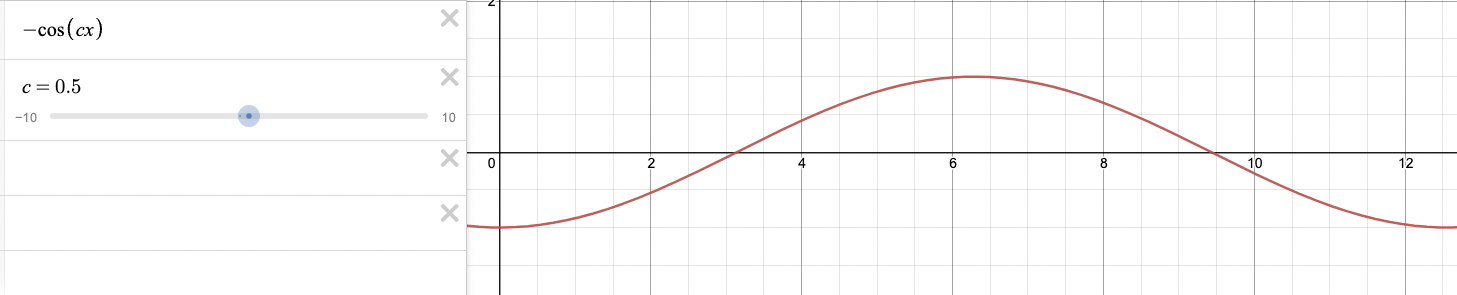

In [295]:
-np.cos(0.5*df_train.MoSold)

1     -0.070737
2     -0.540302
3     -0.708670
4      0.801144
5     -0.708670
         ...   
759    0.801144
760    0.989992
761    0.653644
762    0.936457
763    0.210796
Name: MoSold, Length: 2580, dtype: float64

In [296]:
(-np.cos(0.5*df_train.MoSold)).describe()
#after the transformation, the min is closed to -1 and the max is closed to 1

count    2580.000000
mean        0.388439
std         0.635138
min        -0.960170
25%        -0.070737
50%         0.653644
75%         0.936457
max         0.989992
Name: MoSold, dtype: float64

In [297]:
df_train.MoSold=-np.cos(0.5*df_train.MoSold)

# Encode Categoical Columns (after ensuring the dtype of those columns is string)

In [298]:
df_train=pd.get_dummies(df_train, drop_first=True)

In [299]:
df_train.head()

GrLivArea  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
1  11.692623     5.684507  18.947401            6            6       1939   
2  12.260567     5.053371  16.665342            5            5       1984   
3  12.128185     5.684507  17.953466            5            9       1930   
4  12.233418     6.221214  19.070362            4            8       1900   
5  13.617632     5.968981  19.189158            8            6       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1          1950      0.0000    8.492259    0.000000  10.818201        856.0   
2          1984      7.4692   10.524981    9.672623   6.732788       1049.0   
3          2007      0.0000   11.285513    0.000000   6.654950        837.0   
4          2003      0.0000    0.000000    0.000000   9.746321        405.0   
5          2001      0.0000   10.922352    0.000000   7.711554        810.0   

    1stFlrSF   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1  11.692623   0.000000           0.0           1.0           0.0         1   
2  12.260567   0.000000           0.0           1.0           0.0         2   
3  12.128185   0.000000           0.0           0.0           0.0         1   
4  11.211682   9.192820           0.0           0.0           0.0         1   
5  11.541318  11.689408           0.0           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1         0             2      0.730463             4           1   
2         0             2      0.730463             5           0   
3         0             2      0.730463             5           0   
4         0             2      0.730463             6           0   
5         1             3      0.730463             6           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1       1939.0         2.0       399.0    0.000000     0.000000   
2       1984.0         1.0       266.0    0.000000     6.751853   
3       1930.0         1.0       216.0    7.538898     0.000000   
4       1940.0         1.0       281.0    0.000000     0.000000   
5       2001.0         2.0       528.0    0.000000     5.172535   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
1       0.000000     0.0000     7.698683       0.0      0.0 -0.070737    2010   
2       0.000000     0.0000     0.000000       0.0      0.0 -0.540302    2009   
3       5.053371     6.3601     0.000000       0.0      0.0 -0.708670    2007   
4       7.724359     0.0000     6.863135       0.0      0.0  0.801144    2009   
5       0.000000     0.0000     0.000000       0.0      0.0 -0.708670    2009   

   MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   
5               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1              0              1              0              0              0   
2              0              0              0              0              0   
3              0              1              0              0              0   
4              0              0              0              0              0   
5              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0        

# Standardization/Standard Scaling

In [300]:
standard=StandardScaler() #give each column the same range of values and centered around 0
standard.fit(df_train)
df_train=pd.DataFrame(standard.transform(df_train), index=df_train.index, columns=df_train.columns)

In [301]:
df_train

GrLivArea  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1    -1.514117    -0.291069 -0.256266    -0.033733     0.339988  -1.053847   
2    -0.921493    -1.333520 -1.394813    -0.765088    -0.551444   0.460593   
3    -1.059627    -0.291069 -0.752152    -0.765088     3.014285  -1.356735   
4    -0.949821     0.595413 -0.194919    -1.496443     2.122852  -2.366362   
5     0.494543     0.178798 -0.135650     1.428977     0.339988   1.032715   
..         ...          ...       ...          ...          ...        ...   
759  -1.206568    -0.745137 -0.033407    -0.033733     0.339988  -1.827894   
760   0.621936    -0.048564  0.843320    -2.227798    -0.551444  -0.515379   
761   1.087574     0.673439 -0.689235    -0.765088     0.339988  -0.717305   
762   0.817546     0.178798 -0.039582     0.697622    -0.551444   0.999061   
763   0.936346     0.595413  0.115827     1.428977    -0.551444   0.763481   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1       -1.647539   -0.772353    0.246151   -0.373927   0.463652    -0.431804   
2        0.012109    1.053244    0.650026    2.690851  -0.742676     0.029483   
3        1.134812   -0.772353    0.801134   -0.373927  -0.765660    -0.477215   
4        0.939559   -0.772353   -1.441152   -0.373927   0.147151    -1.509733   
5        0.841933   -0.772353    0.728979   -0.373927  -0.453669    -0.541748   
..            ...         ...         ...         ...        ...          ...   
759     -1.647539   -0.772353   -1.441152   -0.373927   0.808879    -0.202355   
760     -1.403473   -0.772353   -1.441152   -0.373927  -2.730714    -2.477719   
761     -1.647539   -0.772353    0.326735   -0.373927   0.579839    -0.085241   
762      0.793120    1.035719    0.872373   -0.373927  -0.546402    -0.123482   
763      0.500240    0.964056    0.464376   -0.373927   0.132705    -0.620621   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1   -0.761385 -0.867554     -0.111891      1.089555      -0.25474 -1.009265   
2   -0.138207 -0.867554     -0.111891      1.089555      -0.25474  0.823179   
3   -0.283463 -0.867554     -0.111891     -0.838464      -0.25474 -1.009265   
4   -1.289099  0.764958     -0.111891     -0.838464      -0.25474 -1.009265   
5   -0.927405  1.208316     -0.111891      1.089555      -0.25474  0.823179   
..        ...       ...           ...           ...           ...       ...   
759 -0.437980 -0.867554     -0.111891     -0.838464      -0.25474 -1.009265   
760  1.484798 -0.867554     -0.111891     -0.838464      -0.25474  0.823179   
761 -0.283463  1.286237     -0.111891     -0.838464      -0.25474  0.823179   
762 -0.333198  1.209458     -0.111891      1.089555      -0.25474  0.823179   
763 -0.091042  1.203152     -0.111891     -0.838464      -0.25474  0.823179   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1   -0.757892     -1.033650     -0.194425     -1.555298    0.610254   
2   -0.757892     -1.033650     -0.194425     -0.903785   -0.931817   
3   -0.757892     -1.033650     -0.194425     -0.903785   -0.931817   
4   -0.757892     -1.033650     -0.194425     -0.252272   -0.931817   
5    1.245552      0.181855     -0.194425     -0.252272   -0.931817   
..        ...           ...           ...           ...         ...   
759 -0.757892     -1.033650     -0.194425     -1.555298    0.610254   
760 -0.757892      1.397359     -0.194425      1.050754    0.610254   
761 -0.757892      1.397359      4.694720      1.050754   -0.931817   
762  1.245552      0.181855     -0.194425      0.399241    0.610254   
763  1.245552      0.181855     -0.194425      1.050754    0.610254   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1      -1.588393    0.341716   -0.327129   -0.941444    -1.040546   
2       0.226547   -1.012549   -0.968413   -0.941444     1.134955   
3      -1.951381   -1.012549   -1.209497    0.947157    -1.040546   
4      -1.548061 

In [302]:
#In production, use pipeline to encode and standard scale
#pd.get_dummies(df_test)
#
#df_dummmied=pd.get_dummies()
#pipe = Pipeline(
#    [("standardize", StandardScaler()), ("df_dummmied", df_dummmied)])

# Target Transformation

<AxesSubplot:>

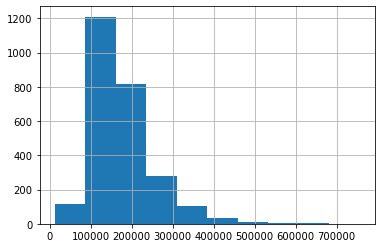

In [303]:
target.hist()
#the target Sale Price is right skewed

/home/jacquizz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jacquizz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


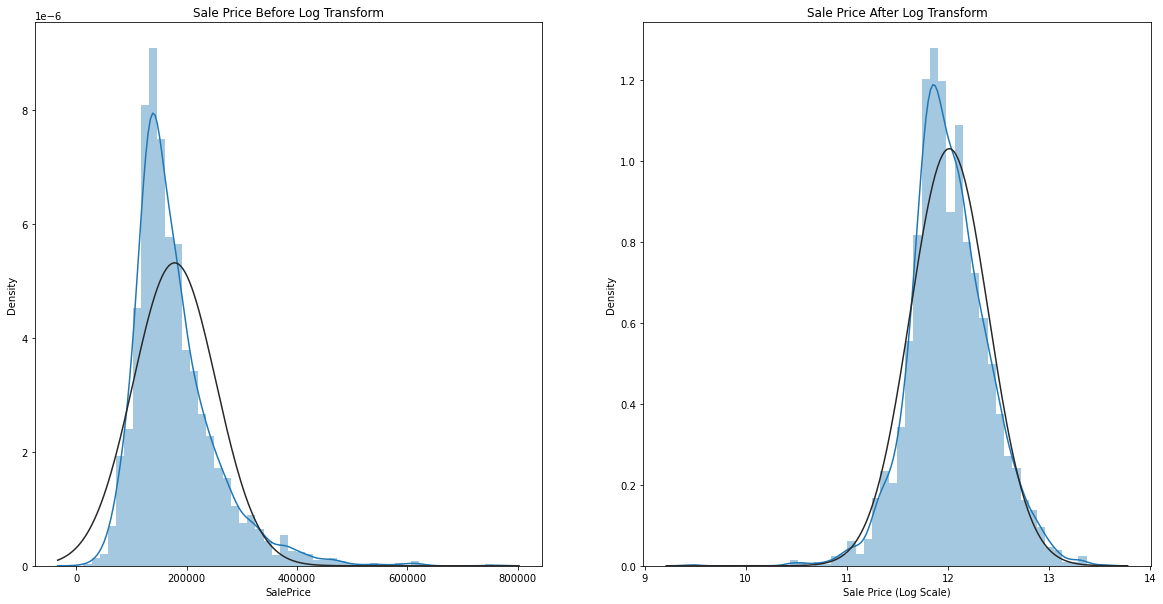

In [304]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Sale Price Before Log Transform")
sns.distplot(target,fit=scipy.stats.norm)
#the data's density plot does not lie up with a normal distrubtion very well

plt.subplot(1, 2, 2)
plt.title("Sale Price After Log Transform")
sns.distplot(np.log(target),fit=scipy.stats.norm)
plt.xlabel("Sale Price (Log Scale)")
#the data's density plot fits much better with a normal distrubtion after the log transmation
plt.show()

In [305]:
log_target=np.log(target)
#We're going to predict on the log Sale Price

In [306]:
#After making prediction with our modeals, 
#we need get back to the original Sale Price by exponentiating
np.exp(log_target)

1      126000.0
2      139500.0
3      124900.0
4      114000.0
5      227000.0
         ...   
759    121000.0
760    139600.0
761    145000.0
762    217500.0
763    215000.0
Name: SalePrice, Length: 2580, dtype: float64

In [307]:
df_train.isna().sum()

GrLivArea                0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSSubClass_150           0
MSSubClass_160           0
M

# Feature Selection (Forward Stepwise)

In [308]:
#write a for loop for feature selectiopn 
#or use lasso to select the features 
import statsmodels.api as sm

In [309]:
def forward_selection(data, target, significance_level=0.001):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
#from here 
#https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [310]:
import statsmodels.api as sm
forward_selected_features=forward_selection(df_train, log_target, significance_level=0.001)

<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-309-4db5b023a1c4>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

In [311]:
forward_selected_features

['GarageCars',
 'OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'LotArea',
 'YearBuilt',
 'OverallCond',
 'TotalBsmtSF',
 'Neighborhood_Crawfor',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'HeatingQC_TA',
 'Condition1_Norm',
 'BsmtFullBath',
 'Functional_Typ',
 'Fireplaces',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_GrnHill',
 'BsmtExposure_Gd',
 'Condition2_PosN',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'SaleCondition_Family',
 'GarageCond_Fa',
 'Exterior1st_BrkFace',
 'YearRemodAdd',
 'ExterCond_Fa',
 'Neighborhood_BrkSide',
 'BsmtQual_Gd',
 'Neighborhood_Edwards',
 'Functional_Maj2',
 'MSSubClass_85',
 'ScreenPorch',
 'BsmtQual_TA',
 'Condition1_PosN',
 'CentralAir_Y',
 'BsmtQual_Fa',
 'BsmtFinType1_Unf',
 'MSSubClass_90',
 'BldgType_Duplex',
 'Functional_Sal',
 'SaleCondition_Partial',
 'SaleCondition_Normal']

In [312]:
len(forward_selected_features)

47

In [313]:
df_train_final=pd.DataFrame()

In [314]:
for feature in forward_selected_features:
    df_train_final[feature]=df_train[feature]
df_train_final.shape


(2580, 47)

Modeling

In [315]:
from sklearn.linear_model import LinearRegression

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,   1.,   1.,
          3.,   7.,   5.,  33.,  68., 176., 329., 616., 612., 403., 187.,
         70.,  32.,  14.,   8.,   3.,   0.,   5.]),
 array([-1.44441841, -1.39635027, -1.34828214, -1.30021401, -1.25214587,
        -1.20407774, -1.1560096 , -1.10794147, -1.05987334, -1.0118052 ,
        -0.96373707, -0.91566893, -0.8676008 , -0.81953267, -0.77146453,
        -0.7233964 , -0.67532826, -0.62726013, -0.579192  , -0.53112386,
        -0.48305573, -0.4349876 , -0.38691946, -0.33885133, -0.29078319,
        -0.24271506, -0.19464693, -0.14657879, -0.09851066, -0.05044252,
        -0.00237439,  0.04569374,  0.09376188,  0.14183001,  0.18989815,
         0.23796628,  0.28603441,  0.33410255,  0.38217068,  0.43023881,
         0.47830695]),
 <BarContainer object of 40 artists>)

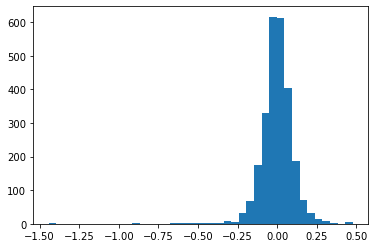

In [316]:
lm = LinearRegression()
lm.fit(df_train_final, log_target)
residuals = log_target - lm.predict(df_train_final)
plt.hist(residuals,bins=40)

In [317]:
print('R^2 is equal to %.6f' %(lm.score(df_train_final, log_target)))
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))


R^2 is equal to 0.933743
RSS is equal to 25.636
The intercept is 12.013


In [318]:
import statsmodels.api as sm
x = sm.add_constant(df_train_final)
model = sm.OLS(log_target, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     776.0
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:36:15   Log-Likelihood:                 2288.0
No. Observations:                2580   AIC:                            -4482.
Df Residuals:                    2533   BIC:                            -4207.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [319]:
!pip install xgboost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV
from matplotlib import cm
from numpy import arange
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import boxcox1p
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
%matplotlib inline

In [320]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final, log_target, test_size=0.3, random_state=0)

xgb boost: Using XGB boost to figure out what the most important features are 

In [338]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [341]:
from sklearn.metrics import mean_absolute_error
mean_train = np.mean(y_train)
baseline_predictions = np.ones(y_test.shape) * mean_train
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.30


In [342]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [346]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=15
)


[15:45:49] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:8.06356
[1]	Test-mae:5.64700
[2]	Test-mae:3.95553
[3]	Test-mae:2.77147
[4]	Test-mae:1.94054
[5]	Test-mae:1.36068
[6]	Test-mae:0.95496
[7]	Test-mae:0.67232
[8]	Test-mae:0.47559
[9]	Test-mae:0.34088
[10]	Test-mae:0.24695
[11]	Test-mae:0.18402
[12]	Test-mae:0.14335
[13]	Test-mae:0.11822
[14]	Test-mae:0.10453
[15]	Test-mae:0.09670
[16]	Test-mae:0.09185
[17]	Test-mae:0.08884
[18]	Test-mae:0.08685
[19]	Test-mae:0.08544
[20]	Test-mae:0.08436
[21]	Test-mae:0.08353
[22]	Test-mae:0.08258
[23]	Test-mae:0.08233
[24]	Test-mae:0.08173
[25]	Test-mae:0.08154
[26]	Test-mae:0.08161
[27]	Test-mae:0.08144
[28]	Test-mae:0.08094
[29]	Test-mae:0.08081
[30]	Test-mae:0.08064
[31]	Test-mae:0.08056
[32]	Test-mae:0.08046
[33]	Test-mae:0.08057
[34]	Test-mae:0.08047
[35]	Test-mae:0.08024
[36]	Test-mae:0.08034
[37]	Test-mae:0.08022
[38]	Test-mae:0.07999
[39]	Test-mae:0.08014
[40]	Test-m

In [347]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 0.08 with 63 rounds


In [351]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=0,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=15
)
cv_results

[15:48:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0         8.061232       0.003400       8.061235      0.020889
1         5.646237       0.002380       5.646225      0.018186
2         3.954713       0.001665       3.954603      0.016495
3         2.770392       0.001114       2.770045      0.015192
4         1.941614       0.000804       1.941646      0.013502
5         1.361116       0.000644       1.361800      0.013506
6         0.954484       0.000497       0.955639      0.012936
7         0.670119       0.000422       0.671200      0.011430
8         0.471042       0.000333       0.472847      0.010648
9         0.331890       0.000222       0.336168      0.009543
10        0.235058       0.000380       0.242527      0.007339
11        0.169020       0.000666       0.181557      0.006407
12        0.125531       0.001063       0.142997      0.005437
13        0.098130       0.001496       0.119631      0.003984
14        0.081704       0.001535       0.106528      0.003572
15        0.071379       0.001618       0.099139      0.003623
16        0.064568       0.001621       0.094951      0.003302
17        0.060195       0.001711       0.092219      0.003703
18        0.057138       0.001833       0.090577      0.003754
19        0.054260       0.001258       0.089167      0.003962
20        0.052126       0.001278       0.088110      0.004296
21        0.050617       0.001026       0.087267      0.004384
22        0.049243       0.000849       0.086818      0.004352
23        0.047464       0.000758       0.086378      0.004316
24        0.046164       0.000680       0.085874      0.004171
25        0.045052       0.000602       0.085572      0.004224
26        0.043862       0.000555       0.085240      0.003979
27        0.042532       0.000520       0.084971      0.003865
28        0.041616       0.000567       0.084796      0.003797
29        0.040541       0.000635       0.084648      0.003880
30        0.039832       0.000608       0.084554      0.003866
31        0.038913       0.000837       0.084412      0.003987
32        0.038234       0.000747       0.084210      0.004026
33        0.037393       0.000794       0.084030      0.003908
34        0.036611       0.000829       0.083986      0.003774
35        0.035816       0.000593       0.083881      0.003713
36        0.035269       0.000710       0.083885      0.003731
37        0.034493       0.000509       0.083819      0.003710
38        0.033484       0.000455       0.083823      0.003648
39        0.032894       0.000408       0.083695      0.003637
40        0.032293       0.000340       0.083720      0.003552
41        0.031792       0.000387       0.083666      0.003567
42        0.031383       0.000425       0.083675      0.003469
43        0.030810       0.000474       0.083562      0.003481
44        0.030221       0.000417       0.083433      0.003434
45        0.029652       0.000346       0.083366      0.003447
46        0.029227       0.000247       0.083342      0.003509
47        0.028776       0.000255       0.083279      0.003389
48        0.028159       0.000275       0.083398      0.003340
49        0.027707       0.000211       0.083343      0.003311
50        0.027148       0.000363       0.083256      0.003287
51        0.026698       0.000417       0.083158      0.003345

In [352]:
cv_results['test-mae-mean'].min()

0.0831582

In [359]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [361]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=0,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=15
    )    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[16:04:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.08379600000000001 for 30 rounds
Best params: 9, 5, MAE: 0.08379600000000001
CV with max_depth=9, min_child_weight=6
[16:04:27] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:27] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:

In [362]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [363]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [364]:
min_mae = float("Inf")
best_params = None
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))   
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample   
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=0,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=15
    )    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
        print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[16:06:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0829602 for 55 rounds
Best params: 1.0, 1.0, MAE: 0.0829602
CV with subsample=1.0, colsample=0.9
[16:06:22] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: ../src

	MAE 0.085913 for 31 rounds
CV with subsample=0.7, colsample=0.9
[16:07:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.08418479999999999 for 40 rounds
CV with subsample=0.7, colsample=0.8
[16:07:07] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:07] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:07] WARNING: ../src

In [365]:
params['subsample'] = .7
params['colsample_bytree'] = .7

In [381]:
%time
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))    # We update our parameters
    params['eta'] = eta    # Run and time CV
    %time cv_results = xgb.cv( params, dtrain, num_boost_round=num_boost_round, seed=0, nfold=5, metrics=['mae'], early_stopping_rounds=15)
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 12.4 µs
CV with eta=0.3
[16:17:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 29.8 s, sys: 419 ms, total: 30.2 s
Wall time: 4.07 s
	MAE 0.08391760000000001 for 43 rounds

CV with eta=0.2
[16:17:40] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:40] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now d

In [382]:
params['eta'] = .01

In [383]:
params

{'max_depth': 9,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 0.7,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [386]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=15
)
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[16:22:08] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:11.40039
[1]	Test-mae:11.28657
[2]	Test-mae:11.17400
[3]	Test-mae:11.06237
[4]	Test-mae:10.95185
[5]	Test-mae:10.84254
[6]	Test-mae:10.73421
[7]	Test-mae:10.62689
[8]	Test-mae:10.52072
[9]	Test-mae:10.41556
[10]	Test-mae:10.31146
[11]	Test-mae:10.20843
[12]	Test-mae:10.10638
[13]	Test-mae:10.00548
[14]	Test-mae:9.90541
[15]	Test-mae:9.80657
[16]	Test-mae:9.70855
[17]	Test-mae:9.61163
[18]	Test-mae:9.51570
[19]	Test-mae:9.42057
[20]	Test-mae:9.32641
[21]	Test-mae:9.23331
[22]	Test-mae:9.14098
[23]	Test-mae:9.04973
[24]	Test-mae:8.95941
[25]	Test-mae:8.86997
[26]	Test-mae:8.78140
[27]	Test-mae:8.69360
[28]	Test-mae:8.60679
[29]	Test-mae:8.52072
[30]	Test-mae:8.43566
[31]	Test-mae:8.35142
[32]	Test-mae:8.26794
[33]	Test-mae:8.18543
[34]	Test-mae:8.10370
[35]	Test-mae:8.02279
[36]	Test-mae:7.94262
[37]	Test-mae:7.86333
[38]	Test-mae:7.78486
[39]	Test-mae:7.707

[356]	Test-mae:0.33216
[357]	Test-mae:0.32908
[358]	Test-mae:0.32602
[359]	Test-mae:0.32299
[360]	Test-mae:0.31997
[361]	Test-mae:0.31703
[362]	Test-mae:0.31408
[363]	Test-mae:0.31115
[364]	Test-mae:0.30825
[365]	Test-mae:0.30539
[366]	Test-mae:0.30252
[367]	Test-mae:0.29974
[368]	Test-mae:0.29694
[369]	Test-mae:0.29424
[370]	Test-mae:0.29156
[371]	Test-mae:0.28888
[372]	Test-mae:0.28619
[373]	Test-mae:0.28356
[374]	Test-mae:0.28097
[375]	Test-mae:0.27841
[376]	Test-mae:0.27587
[377]	Test-mae:0.27341
[378]	Test-mae:0.27092
[379]	Test-mae:0.26843
[380]	Test-mae:0.26599
[381]	Test-mae:0.26358
[382]	Test-mae:0.26116
[383]	Test-mae:0.25879
[384]	Test-mae:0.25644
[385]	Test-mae:0.25415
[386]	Test-mae:0.25190
[387]	Test-mae:0.24962
[388]	Test-mae:0.24738
[389]	Test-mae:0.24518
[390]	Test-mae:0.24300
[391]	Test-mae:0.24088
[392]	Test-mae:0.23875
[393]	Test-mae:0.23662
[394]	Test-mae:0.23454
[395]	Test-mae:0.23245
[396]	Test-mae:0.23043
[397]	Test-mae:0.22846
[398]	Test-mae:0.22646
[399]	Test-

[713]	Test-mae:0.07361
[714]	Test-mae:0.07358
[715]	Test-mae:0.07356
[716]	Test-mae:0.07354
[717]	Test-mae:0.07352
[718]	Test-mae:0.07350
[719]	Test-mae:0.07346
[720]	Test-mae:0.07344
[721]	Test-mae:0.07343
[722]	Test-mae:0.07339
[723]	Test-mae:0.07338
[724]	Test-mae:0.07336
[725]	Test-mae:0.07334
[726]	Test-mae:0.07332
[727]	Test-mae:0.07331
[728]	Test-mae:0.07329
[729]	Test-mae:0.07327
[730]	Test-mae:0.07324
[731]	Test-mae:0.07322
[732]	Test-mae:0.07321
[733]	Test-mae:0.07319
[734]	Test-mae:0.07317
[735]	Test-mae:0.07317
[736]	Test-mae:0.07315
[737]	Test-mae:0.07312
[738]	Test-mae:0.07310
[739]	Test-mae:0.07308
[740]	Test-mae:0.07305
[741]	Test-mae:0.07306
[742]	Test-mae:0.07305
[743]	Test-mae:0.07305
[744]	Test-mae:0.07303
[745]	Test-mae:0.07300
[746]	Test-mae:0.07297
[747]	Test-mae:0.07296
[748]	Test-mae:0.07296
[749]	Test-mae:0.07294
[750]	Test-mae:0.07293
[751]	Test-mae:0.07293
[752]	Test-mae:0.07290
[753]	Test-mae:0.07289
[754]	Test-mae:0.07289
[755]	Test-mae:0.07288
[756]	Test-

In [387]:
#Best MAE .07

In [389]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[16:24:30] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:11.40039
[1]	Test-mae:11.28656
[2]	Test-mae:11.17400
[3]	Test-mae:11.06237
[4]	Test-mae:10.95185
[5]	Test-mae:10.84254
[6]	Test-mae:10.73421
[7]	Test-mae:10.62689
[8]	Test-mae:10.52072
[9]	Test-mae:10.41556
[10]	Test-mae:10.31146
[11]	Test-mae:10.20843
[12]	Test-mae:10.10638
[13]	Test-mae:10.00548
[14]	Test-mae:9.90541
[15]	Test-mae:9.80657
[16]	Test-mae:9.70855
[17]	Test-mae:9.61163
[18]	Test-mae:9.51570
[19]	Test-mae:9.42057
[20]	Test-mae:9.32641
[21]	Test-mae:9.23331
[22]	Test-mae:9.14098
[23]	Test-mae:9.04973
[24]	Test-mae:8.95941
[25]	Test-mae:8.86997
[26]	Test-mae:8.78140
[27]	Test-mae:8.69360
[28]	Test-mae:8.60679
[29]	Test-mae:8.52072
[30]	Test-mae:8.43566
[31]	Test-mae:8.35142
[32]	Test-mae:8.26794
[33]	Test-mae:8.18543
[34]	Test-mae:8.10370
[35]	Test-mae:8.02279
[36]	Test-mae:7.94262
[37]	Test-mae:7.86333
[38]	Test-mae:7.78486
[39]	Test-mae:7.707

[355]	Test-mae:0.33528
[356]	Test-mae:0.33216
[357]	Test-mae:0.32908
[358]	Test-mae:0.32602
[359]	Test-mae:0.32299
[360]	Test-mae:0.31997
[361]	Test-mae:0.31703
[362]	Test-mae:0.31408
[363]	Test-mae:0.31115
[364]	Test-mae:0.30825
[365]	Test-mae:0.30539
[366]	Test-mae:0.30252
[367]	Test-mae:0.29974
[368]	Test-mae:0.29694
[369]	Test-mae:0.29424
[370]	Test-mae:0.29156
[371]	Test-mae:0.28888
[372]	Test-mae:0.28619
[373]	Test-mae:0.28356
[374]	Test-mae:0.28097
[375]	Test-mae:0.27841
[376]	Test-mae:0.27587
[377]	Test-mae:0.27341
[378]	Test-mae:0.27092
[379]	Test-mae:0.26843
[380]	Test-mae:0.26599
[381]	Test-mae:0.26358
[382]	Test-mae:0.26116
[383]	Test-mae:0.25879
[384]	Test-mae:0.25644
[385]	Test-mae:0.25415
[386]	Test-mae:0.25190
[387]	Test-mae:0.24962
[388]	Test-mae:0.24738
[389]	Test-mae:0.24518
[390]	Test-mae:0.24300
[391]	Test-mae:0.24088
[392]	Test-mae:0.23875
[393]	Test-mae:0.23662
[394]	Test-mae:0.23454
[395]	Test-mae:0.23245
[396]	Test-mae:0.23043
[397]	Test-mae:0.22846
[398]	Test-

[712]	Test-mae:0.07363
[713]	Test-mae:0.07361
[714]	Test-mae:0.07358
[715]	Test-mae:0.07356
[716]	Test-mae:0.07354
[717]	Test-mae:0.07352
[718]	Test-mae:0.07350
[719]	Test-mae:0.07346
[720]	Test-mae:0.07344
[721]	Test-mae:0.07343
[722]	Test-mae:0.07339
[723]	Test-mae:0.07338
[724]	Test-mae:0.07336
[725]	Test-mae:0.07334
[726]	Test-mae:0.07332
[727]	Test-mae:0.07331
[728]	Test-mae:0.07329
[729]	Test-mae:0.07327
[730]	Test-mae:0.07324
[731]	Test-mae:0.07322
[732]	Test-mae:0.07321
[733]	Test-mae:0.07319
[734]	Test-mae:0.07317
[735]	Test-mae:0.07317
[736]	Test-mae:0.07315
[737]	Test-mae:0.07312
[738]	Test-mae:0.07310
[739]	Test-mae:0.07308
[740]	Test-mae:0.07305
[741]	Test-mae:0.07306
[742]	Test-mae:0.07305
[743]	Test-mae:0.07305
[744]	Test-mae:0.07303
[745]	Test-mae:0.07300
[746]	Test-mae:0.07297
[747]	Test-mae:0.07296
[748]	Test-mae:0.07296
[749]	Test-mae:0.07294
[750]	Test-mae:0.07293
[751]	Test-mae:0.07293
[752]	Test-mae:0.07290
[753]	Test-mae:0.07289
[754]	Test-mae:0.07289
[755]	Test-

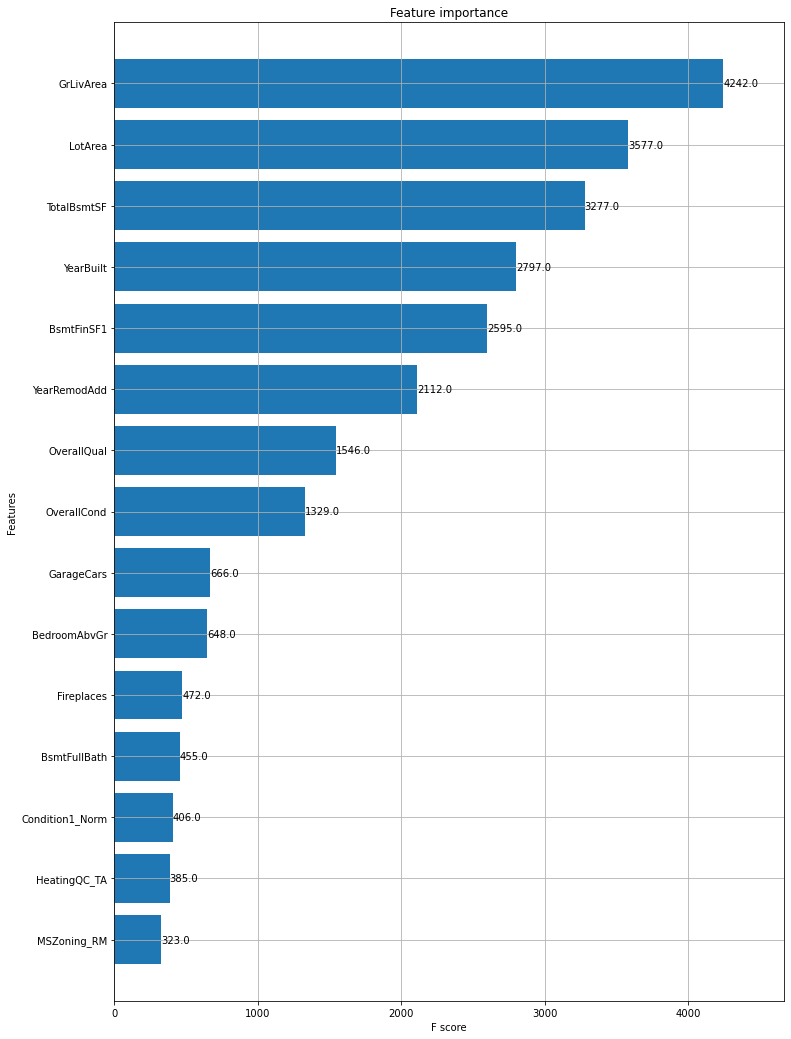

In [396]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(best_model, max_num_features=15, height=.8, ax=ax)
plt.show()


In [413]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_squared_error(best_model.predict(dtest), y_test)

0.012947289644775485

In [406]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.07126847919930618

In [410]:
np.sqrt(mean_squared_error(best_model.predict(dtest), y_test))

0.1137861575270713

In [414]:
r2_score(best_model.predict(dtest), y_test)

0.9023054530237427

In [416]:
mean_squared_error(best_model.predict(dtrain), y_train)

0.002898996057991985

In [415]:
mean_absolute_error(best_model.predict(dtrain), y_train)

0.03919941386536651

In [417]:
np.sqrt(mean_squared_error(best_model.predict(dtrain), y_train))

0.05384232589693711

In [418]:
r2_score(best_model.predict(dtrain), y_train)

0.9792682062910142